<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana3/NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [114]:
def Function(x):
    #return 5*(1-np.exp(-x)) - x
    #return x**2 + 1
    #return x**x - 100
    #return 0.5*(5*x**3 - 3*x)
    #return (35*x**4 - 30*x**2 + 3)/8
    return (429*x**7 - 693*x**5 + 315*x**3 - 35*x) / 16

In [115]:
x = np.linspace(-1,1,100)
y = Function(x)

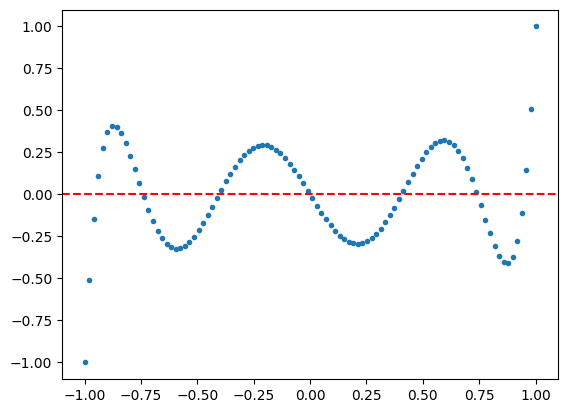

In [116]:
plt.plot(x,y,'.')
plt.axhline(y=0,color='r',linestyle='--')

In [83]:
for i in range(len(x)-1):
  fi = Function(x[i])
  fj = Function(x[i+1])
  if fi*fj < 0:
    print(x[i])

-0.8787878787878788
-0.3535353535353535
0.3333333333333335
0.8585858585858588


In [117]:
np.sqrt(3/5)

0.7745966692414834

In [118]:
def Derivative(f,x,h=1e-6):
  return (f(x+h)-f(x-h))/(2*h)

In [119]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-14):

  error = 1
  it = 0

  while error > precision and it < itmax:

    try:
      dfxn = df(f,xn)
      if np.abs(dfxn) < 1e-16:
        return False

      xn1 = xn - f(xn)/dfxn
      error = np.abs(xn1-xn)
    except ZeroDivisionError:
      print('Division por error')
      return False

    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    return xn

In [120]:
root = GetNewtonMethod(Function,Derivative,0.9)
root

0.9491079123427585

In [121]:
def GetAllRoots(x, atol=1e-9, max_iter = 100, precision = 1e-14):

  Roots = np.array([])

  for x0 in x:
    #print(x)
    root = GetNewtonMethod(Function,Derivative,x0,max_iter,precision)
    #print(x0)
    if root is not False:

      if not any(np.isclose(root, r, atol=atol) for r in Roots):
        print('New root found', root)
        Roots = np.append(Roots,root)

  Roots.sort()

  return Roots

In [122]:
xtrial = np.linspace(-1,1,10)
Roots = GetAllRoots(xtrial)

New root found -0.949107912342759
New root found -0.741531185599394
New root found -0.40584515137739724
New root found 6.027799614067476e-31
New root found 0.40584515137739724
New root found 0.9491079123427583
New root found 0.7415311855993946


In [123]:
r,_ = np.polynomial.legendre.leggauss(7)
r

array([-0.94910791, -0.74153119, -0.40584515,  0.        ,  0.40584515,
        0.74153119,  0.94910791])

In [124]:
# Distancia de un punto a una recta

In [139]:
model = lambda x: 5*x + 3
p = np.array([5,10])

In [140]:
def Distance(x,p):
  return np.sqrt(  (p[1]-model(x))**2 + (p[0]-x)**2  )

In [144]:
x = np.linspace(0,5,100)
d = Distance(x,p)

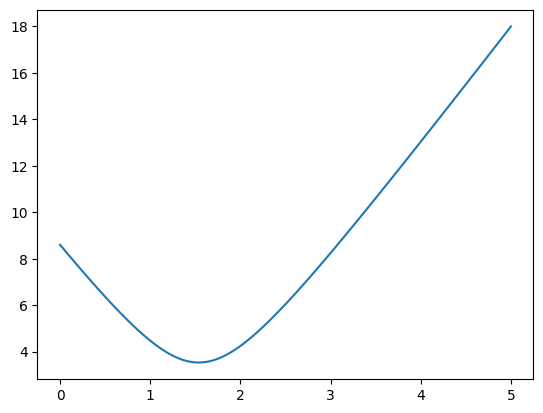

In [145]:
plt.plot(x,d)

In [149]:
for i in range(len(x)-1):
  fi = Derivative(Distance(p),x)
  fj = Derivative(Distance(p),x)
  print(fi,fj)
  if fi*fj < 0:
    print(x[i])

TypeError: Distance() missing 1 required positional argument: 'p'